<a href="https://colab.research.google.com/github/lucas-noblat/GerOndApp/blob/main/Compreens%C3%A3o%20do%20projeto/Processamento_de_Sinais_Digitais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Funções de Plotagem e Funções de Geração de Ondas

**Ignore essa seção caso não seja de interesse**

In [1]:
# Clonando repositório do Github para poder usar as funções que eu criei

!git clone https://github.com/lucas-noblat/GerOndApp.git

Cloning into 'GerOndApp'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 144 (delta 64), reused 4 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (144/144), 3.27 MiB | 9.06 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [2]:
import sys

sys.path.append('/content/GerOndApp/APP')

import functions as fc

In [3]:
vetor_tempo = fc.np.linspace(0, 1 , 1000)

x_senoidal = fc.sinal_senoidal(amplitude = 1, frequencia = 1, t = vetor_tempo, fase = 0)
x_quadrada = fc.sinal_quadrada(amplitude = 1, frequencia = 1, t = vetor_tempo, duty = 0.5)
x_triangular = fc.sinal_triangular(amplitude = 1, frequencia = 1, t = vetor_tempo, simetria = 0.5)
x_ruidoBranco = fc.ruido_branco(amplitude = 1, duracao = 1, taxa_amostragem = 1)

# Processamento de Sinais Digitais


## Sinais

### Definição:

- Sinais são funções de uma ou mais vaiáveis independentes f(x, y, t). que contêm informações sobre o comportamento ou natureza de algum fenômeno.

## Sinal *Digital*

### Definição:

- Um sinal digital nada mais é do que a representação discreta de um sinal analógico (sinal que possui valores contínuos no domínio do tempo e amplitude). Essa conversão é necessária visto que o computador possui capacidade de processamento limitado e não consegue representar valores contínuos.


    Ex: Sinais de áudio medem a pressão do ar em um determinado período.

- Ele é obtido através de duas etapas:


### **Amostragem**

  
  - Conversão do sinal contínuo em uma sequência de valores discretos no tempo. Basicamente é verificar o valor do sinal a cada intervalo de tempo  Δt.

        x_discreto[n] = x_contínuo(n * período amostragem[n])
        
        Onde período de amostragem é um vetor contendo os valores discretos de Δt (0, Δt, 2Δt, 3Δt, ...., NΔt)

<Figure size 1000x600 with 0 Axes>

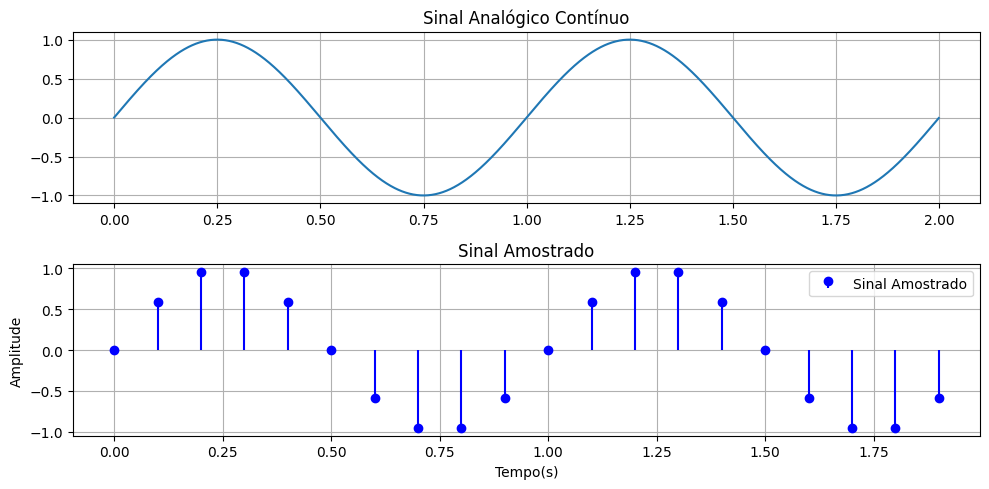

In [4]:
# EXEMPLO DE AMOSTRAGEM

# Sinal Analógico Contínuo

periodo_amostragem = 0.1                          # Pega uma amostra a cada 0.1 segundos
frequencia_amostragem = 1 / periodo_amostragem    # Taxa de amostragem, 10 amostras por segundo

t_continuo = fc.np.arange(0, 2, 0.001)               # Tempo contínuo, de 0 a 2 segundos com passos de 1 ms


sinal_continuo = fc.sinal_senoidal(amplitude = 1.0, frequencia = 1.0, t = t_continuo, fase = 0)  # Gerando Sinal Analógico Contínuo

#Sinal Amostrado

t_amostrado = fc.np.arange(0, 2, periodo_amostragem) # Tempo discretizado

sinal_amostrado = fc.sinal_senoidal(amplitude = 1.0, frequencia = 1.0, t = t_amostrado, fase = 0)  # Gerando sinal amostrado

# Plotando os sinais

fc.plt.figure(figsize=(10,6))

fc.subplotar(sinal_continuo, t_continuo, 'Sinal Analógico Contínuo', 2, 1)

fc.plt.subplot(2,1,2)
fc.plt.stem(t_amostrado, sinal_amostrado, linefmt='b-', markerfmt='bo', basefmt=' ', label="Sinal Amostrado")
fc.plt.title('Sinal Amostrado')
fc.plt.xlabel('Tempo(s)')
fc.plt.ylabel('Amplitude')
fc.plt.grid()
fc.plt.legend()

fc.plt.tight_layout()
fc.plt.show()

## Quantização

- Após a amostragem, o sinal analógico é representado por uma sequência de valores (amostras) no tempo, mas esses valores ainda são contínuos em amplitude.

- A quantização converte esses valores contínuos em um número finito de níveis discretos, que podem ser representados digitalmente (em bits).

- Basicamente separa os valores contínuos em *n* níveis de intervalos (de tamanho x) e associa cada um a 1 bit diferente. Então se o valor contínuo estiver dentro do primeiro invervalo, ele será introduzido no nível 1.
      
      Logicamente com essa aproximação alguns erros irão surgir, esses erros recebem o nome de *ruído de quantização*.

<Figure size 1000x600 with 0 Axes>

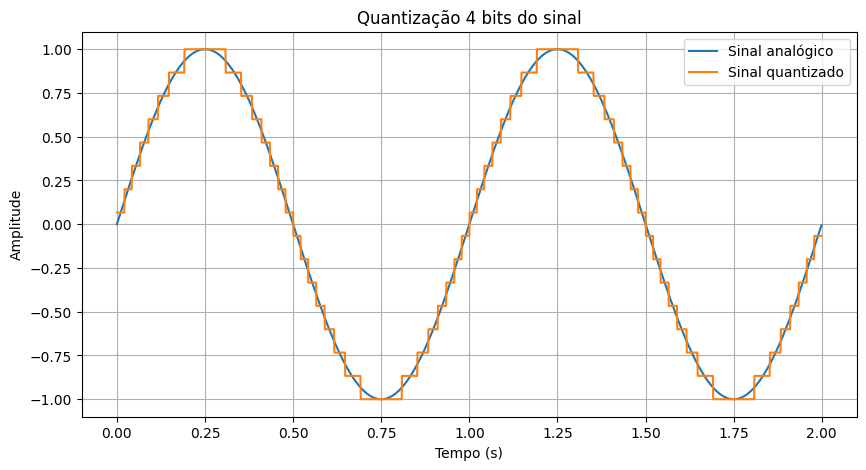

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal analógico
frequencia = 1.0  # Frequência do sinal em Hz
amplitude = 1.0   # Amplitude do sinal
fase = 0.0        # Fase do sinal

# Parâmetros de amostragem
taxa_amostragem = 1000  # Taxa de amostragem em Hz
tempo_total = 2.0       # Duração do sinal em segundos

# Tempo contínuo
t = np.linspace(0, tempo_total, int(taxa_amostragem * tempo_total), endpoint=False)

# Sinal analógico (senoide)
sinal_analogico = amplitude * np.sin(2 * np.pi * frequencia * t + fase)

# Parâmetros de quantização
bits = 4  # Número de bits para quantização
niveis = 2 ** bits  # Número de níveis de quantização

# Quantização
sinal_quantizado = np.round((sinal_analogico + amplitude) * (niveis - 1) / (2 * amplitude))  # Normaliza e quantiza
sinal_quantizado = (sinal_quantizado / (niveis - 1)) * 2 * amplitude - amplitude  # Desnormaliza

# Plotando os gráficos
plt.figure(figsize=(10, 6))

# Plotando sinal analógico e quantizado

fc.plotar_sinais(t, f'Quantização {bits} bits do sinal', sinal_analogico, sinal_quantizado,
                 labels = ['Sinal analógico','Sinal quantizado'])


plt.tight_layout()
plt.show()

## Sinais pares

- Quando

      x(-t)  = x(t)

## Sinais ímpares

- Quando
      x(-t) = -x(t)

**NEM TODO SINAL É CLASSIFICADO COMO PAR OU ÍMPAR, PORÉM TODO SINAL PODE SER DECOMPOSTO EM UMA SOMA DE SINAIS PARES E ÍMPARES**

## Sinais periódicos




Neste notebook avaliaremos os sinais periódicos e quais são as condições necessárias para periodicidade.

Esta propriedade dos sinais está ligada ao ***deslocamento no tempo***, uma transformação da variável independente.

Um sinal periódico, contínuo, é aquele para o qual a seguinte propriedade é válida:
    
\begin{equation}
x(t) = x(t \pm mT_p),
\end{equation}
ou seja, o valor do sinal no instante $t$ [s] é o mesmo para o instante $t \pm mT_p$ [s]. Dessa forma, o sinal se repete a cada
período $T_p$.

$T_p$ é o chamado período fundamental do sinal periódico. Neste caso, $x(t) = x(t \pm T_p) = x(t \pm 2T_p) = ... = x(t \pm kT_p)$.

Para os sinais discretos a definição é análoga:

\begin{equation}
x[n] = x[n \pm m N_p],
\end{equation}
com $N_p$ sendo um número de amostras inteiro.

Um sinal que não é periódico é chamado de aperiódico.

Vamos ver alguns exemplos de sinais periódicos contínuos e discretos.

In [6]:
# importar as bibliotecas necessárias

from scipy import signal # some signals
import IPython.display as ipd # to play signals

In [7]:
# Configurações gerais
fs = 44100
t = np.linspace(0, 1, fs) # vetor temporal
freq = 2000 # Frequencia fundamental

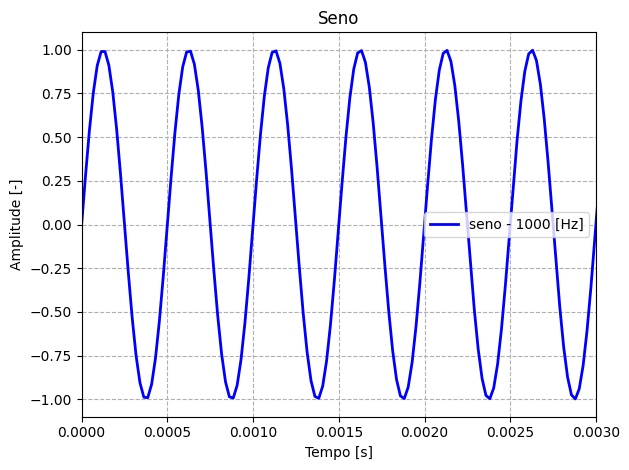

In [8]:
# seno ou cosseno
xt = np.sin(2*np.pi*freq*t)
# Figura
plt.figure()
plt.title('Seno')
plt.plot(t, xt, '-b', linewidth = 2, label = 'seno - 1000 [Hz]')
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 3/1000))
plt.tight_layout()
plt.show()
# play
ipd.Audio(xt, rate=fs) # load a NumPy array

### Um seno com 2 frequências
Se tivermos um sinal

\begin{equation}
x(t) = x(t) = \mathrm{sin}(2  \pi \ m_1 \ f t) + \mathrm{sin}(2  \pi \ m_2 \ f t),
\end{equation}

ele será um sinal periódico desde que $\frac{m_2}{m_1}$ seja um número racional. Do contrário, o sinal será quase-periódico. Ele parecerá periódico, mas se você olhar os detalhes, vai notar que o sinal nunca se repete.

- Um seno com várias frequências é c

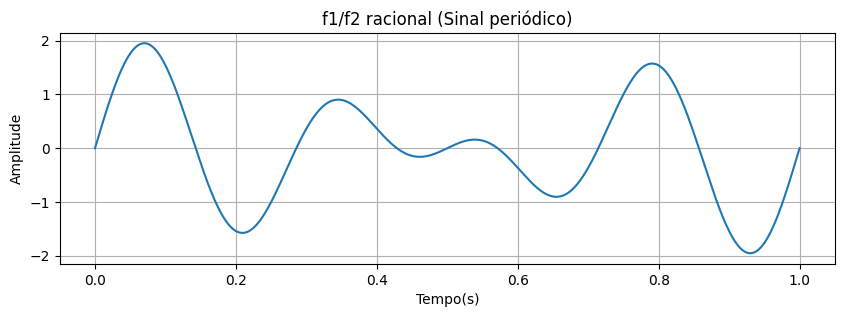

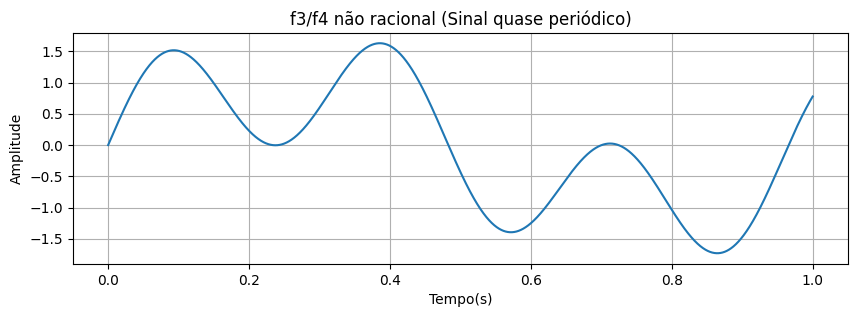

In [9]:
# seno ou cosseno - 2 frequencias

f1 = 4
f2 = 3

f3 = np.pi
f4 = 1

sen = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
sen_n_periodico = np.sin(2*np.pi*f3*t) + np.sin(2*np.pi*f4*t)

fc.plotar(sen, t, 'f1/f2 racional (Sinal periódico)')
fc.plotar(sen_n_periodico, t, 'f3/f4 não racional (Sinal quase periódico)')

# play
ipd.Audio(xt, rate=fs) # load a NumPy array

- f1, f2, f3, .... são as harmônicas

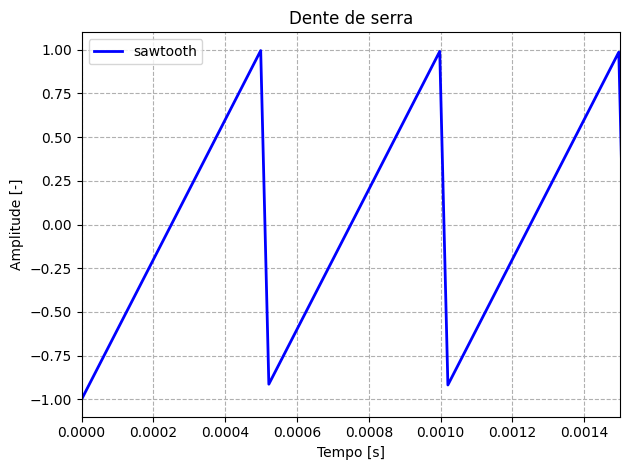

In [10]:
# dente de serra
xt = signal.sawtooth(2 * np.pi * freq * t)
# Figura
plt.figure()
plt.title('Dente de serra')
plt.plot(t, xt, '-b', linewidth = 2, label = 'sawtooth')
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 3/freq))
plt.tight_layout()
plt.show()
# play
ipd.Audio(xt, rate=fs) # load a NumPy array

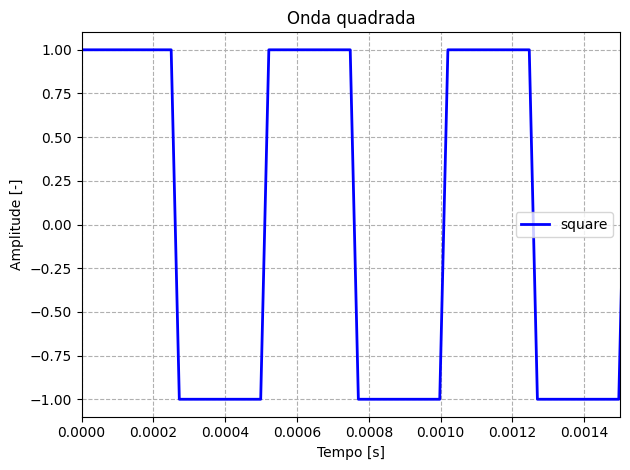

In [11]:
# onda quadrada
xt = signal.square(2 * np.pi * freq * t)
# Figura
plt.figure()
plt.title('Onda quadrada')
plt.plot(t, xt, '-b', linewidth = 2, label = 'square')
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 3/freq))
plt.tight_layout()
plt.show()
# play
ipd.Audio(xt, rate=fs) # load a NumPy array

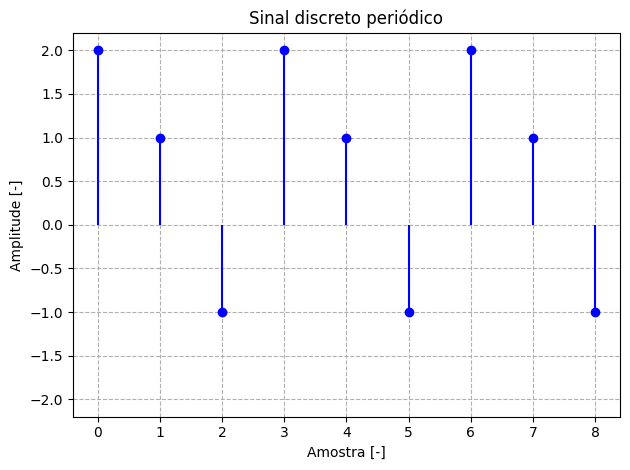

In [12]:
N = 9
n = np.arange(N)
xn = [2, 1, -1, 2, 1, -1, 2, 1, -1]

# Figura
plt.figure()
plt.title('Sinal discreto periódico')
plt.stem(n, xn, '-b', basefmt=" ")
plt.grid(linestyle = '--', which='both')
plt.xlabel('Amostra [-]')
plt.ylabel('Amplitude [-]')
plt.ylim((-2.2, 2.2))
plt.tight_layout()
plt.show()

### Sinais discretos periódicos

A periodicidade em sinais discretos tem um limite prático. Pra pensar nisso, podemos imaginar um sinal contínuo $x(t) = \mathrm{cos}(\omega t)$. À medida que a frequência, $f$, do sinal aumenta, sua taxa de oscilação também aumenta. Mas, o que aconteceria no caso de um sinal do tipo

\begin{equation}
x[n] = \mathrm{cos}(\omega n) \ ?
\end{equation}





<ipython-input-13-345baecb3a7d>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


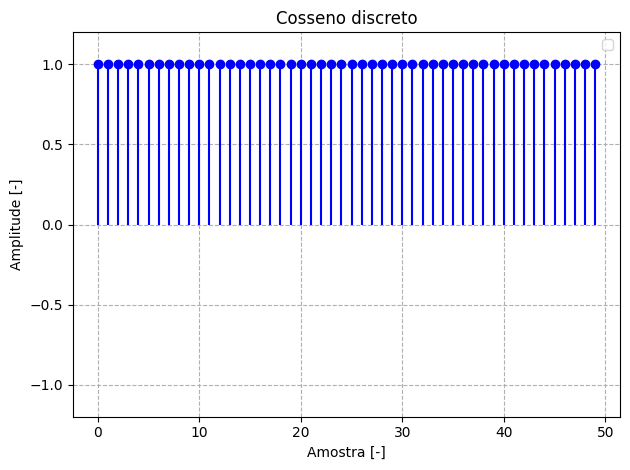

In [13]:
N = 50
n = np.arange(N)
w = 0
xn = np.cos(w*n)

# Figura
plt.figure()
plt.title('Cosseno discreto')
plt.stem(n, xn, '-b', basefmt=" ")
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Amostra [-]')
plt.ylabel('Amplitude [-]')
plt.ylim((-1.2, 1.2))
plt.tight_layout()
plt.show()

## Sinais exponenciais



- São muito comuns e muito utilizado como base na construção de outros sinais.
- Possuem o seguinte formato:

\begin{equation}
{x(t) = A ⋅e^{a\cdot t}}
\end{equation}

- Dependendo das características de A, a e x(t), o sinal exponencial pode aparecer de várias formas. 3 delas são de nosso interesse:

  - Exponencial real
  - Exponencial puramente complexa
  - Exponencial complexa com decaimento.

### Exponencial real

- Idêntico a função exponencial.

### Exponencial puramente complexo

- O valor assumido por 'a' será um número puramente complexo

\begin{equation}
a = j \cdot w
\end{equation}

- Um exemplo são as funções seno e cosseno
- São muito importante para toda a área de processamento de sinais


### Relação com seno e cosseno

\begin{equation}
x(t) = A \cdot cos (2 \pi ft - \phi) \hspace {2cm} (I)
\end{equation}

- A = amplitude
- $\phi$ = fase

  Da relação de Euler:

\begin{equation}   
  cos(θ) = real \{e^ {j ⋅ θ} \} \hspace{2cm} (II)
\end{equation}

  <center>ou</center>

\begin{equation}
  e^{jθ} = cos(\theta) + j \cdot sen(\theta) \hspace{2cm} (III)
\end{equation}


  - Substituindo II na equação I:

\begin{equation}
  x(t) = A \cdot real \{e^ {j ⋅ ({2 \pi f t - \phi})} \}
\end{equation}

  - Trocando $2\pi  r f$ por $ω$:


\begin{equation}
  x(t) = A \cdot real \{e^ {j ⋅ ({ω t - \phi})} \}
\end{equation}

  - Passando o A pra dentro:

\begin{equation}
  x(t) = real  \{A \cdot e^{-j θ}  \cdot e^{jwt}  \}
\end{equation}

  - Onde $ A \cdot e^{-j θ}$ é conhecido como **amplitude complexa**.
  - Então o sinal é composto apenas pela parte real, mesmo introduzindo variáveis complexas.

\begin{equation}
  A_{complexo} = A \cdot e^{-j θ} \hspace{1cm} ou  \hspace{1cm}
  A_{complexo} = c + jd
\end{equation}




  - Da equação **II** tiramos ao invés de utilizar duas funções separadamentes (seno e cosseno) é melhor utilizarmos apenas um com o número $e^{j\theta}$, esse possuirá consigo uma soma de senos e cossenos.
  - Se pegamos a parte real do número $e^{j\theta}$ teremos um **seno**, se pegar a parte complexa teremos um **cosseno**.

### Sinal exponencial real (a = número real)

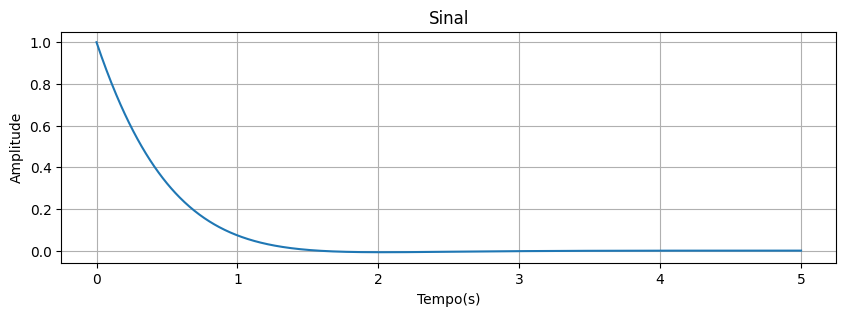

In [14]:
# Vetor tempo

t = np.linspace(0,5,1000)

# Parâmetros do sinal

A = 1               # Amplitude
phi = 0          # Deslocamento

A = A*np.exp(-1j*t) # Amplitude complexa

f = 1               # Frequência do sinal

w = 2*np.pi*f       # Omega

a = -2                    # O expoente na equação x(t) = e^(a*t)

x_t = np.real(A * np.exp(a*t))  #Sinal Gerado

fc.plotar(x_t, t, 'Sinal')

### Sinal exponencial puramente complexo

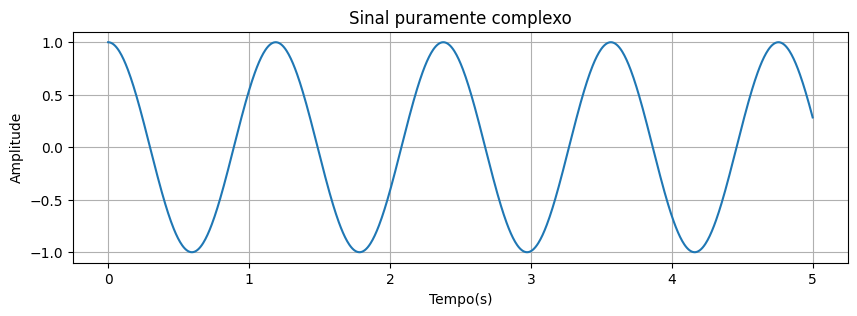

In [15]:
a = 1j * w

x_t = np.real(A*np.exp(a*t))

fc.plotar(x_t, t, 'Sinal puramente complexo')

### Exponencial complexa com decaimento

\begin{equation}
a = a_r + j \cdot w \hspace{2cm} a_r < 0
\end{equation}

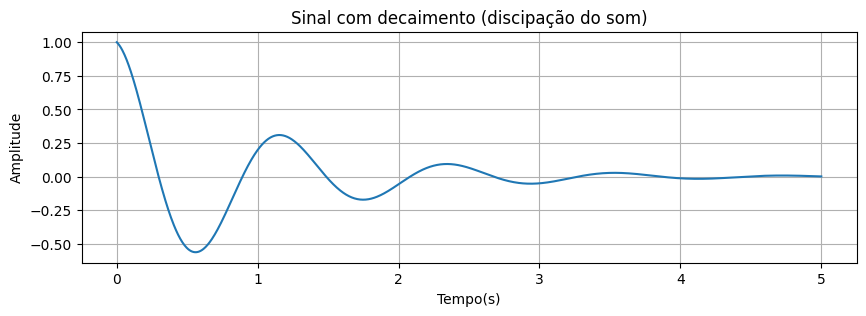

In [16]:
a = -1 + 1j*w
x_t = np.real(A*np.exp(a*t))

fc.plotar(x_t, t, 'Sinal com decaimento (discipação do som)')

a


## Números complexos

Vimos que uma função cossenoidal geral, expressa por:

\begin{equation}
x(t) = \mathrm{Re}\left\{A\mathrm{e}^{-\mathrm{j}\phi} \ \mathrm{e}^{\mathrm{j}\omega t}    \right\}
\end{equation}
em que $\tilde{A} = A\mathrm{e}^{-\mathrm{j}\phi}$ é a amplitude complexa do cosseno e contêm as informações de magnitude, $A$, e fase, $\phi$. Esta amplitude complexa pode ser representada no plano complexo por:


<div>
<img src="attachment:plano_cplx_png.png" width="300"/>
</div>

Imagine que temos duas ondas, ***de mesma frequência***, interferindo entre si. Queremos calcular a onda resultante. Então, podemos somá-las. Se cada uma das ondas é descrita por um número complexo $z_1$ e $z_2$, do tipo:

\begin{equation}
\tilde{z}_1 = a_1 + \mathrm{j} b_1 = |\tilde{z}_1| \mathrm{e}^{\mathrm{j}\phi_1}
\end{equation}

e

\begin{equation}
\tilde{z}_2 = a_2 + \mathrm{j} b_2 = |\tilde{z}_2| \mathrm{e}^{\mathrm{j}\phi_2}
\end{equation}

Vamos fazer algumas análises a seguir

In [17]:
# importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [18]:
# tempo e frequência
t = np.linspace(-2, 2, 1000) # vetor temporal
freq = 1
w = 2*np.pi*freq

# onda 1
M1 = 2
phi_1 = np.deg2rad(0)
z1 = M1*np.exp(1j*phi_1)
xt1 = np.real(z1*np.exp(1j*w*t))

# onda 2
M2 = 1.2
phi_2 = np.deg2rad(0)
z2 = M2*np.exp(1j*phi_2)
xt2 = np.real(z2*np.exp(1j*w*t))

Temos agora 2 opções para calcular a onda resultante. A primeira é somar os sinais no domínio do tempo

\begin{equation}
x(t) = x_1(t) + x_2(t).
\end{equation}

A segunda é somar as amplitudes complexas

\begin{equation}
z = z_1 + z_2
\end{equation}
e então construir o sinal resultante $x(t) = \tilde{z}\mathrm{e}^{\mathrm{j}\omega t}$


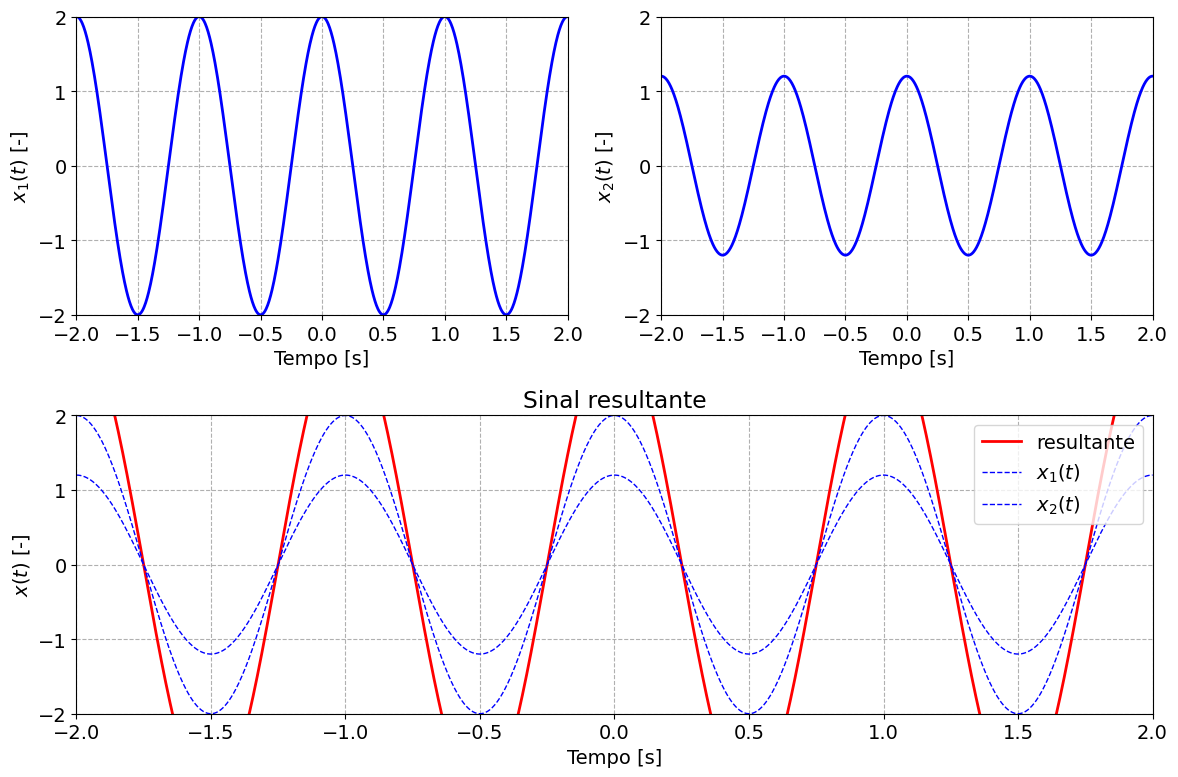

In [19]:
# Sinal resultante pela soma das amplitudes complexas
z = z1+z2
xt = np.real(z*np.exp(1j*w*t))

# Figura
plt.figure(figsize=(12,8))

plt.subplot(2,1,2)
plt.title('Sinal resultante')
plt.plot(t, xt, '-r', linewidth = 2, label = 'resultante')
plt.plot(t, xt1, '--b', linewidth = 1, label = r'$x_1(t)$')
plt.plot(t, xt2, '--b', linewidth = 1, label = r'$x_2(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x(t)$ [-]')
plt.ylim((-2, 2))
plt.xlim((t[0], t[-1]))

plt.subplot(2,2,1)
plt.plot(t, xt1, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x_1(t)$ [-]')
plt.ylim((-2, 2))
plt.xlim((t[0], t[-1]))

plt.subplot(2,2,2)
plt.plot(t, xt2, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x_2(t)$ [-]')
plt.ylim((-2, 2))
plt.xlim((t[0], t[-1]))
plt.tight_layout()
plt.show()


## Impulso unitário

- Define o valor 1 quando valor do sinal for 0, ou seja
  
  \begin{cases}
  \delta (t) = 1, \text{ se } x(t) = 0 \\ \delta (t) = 0, \text { se } x(t) \neq 0
  \end{cases}

In [22]:
def impulso_unitario(sinal):
  return (sinal == np.around(0)) * 1

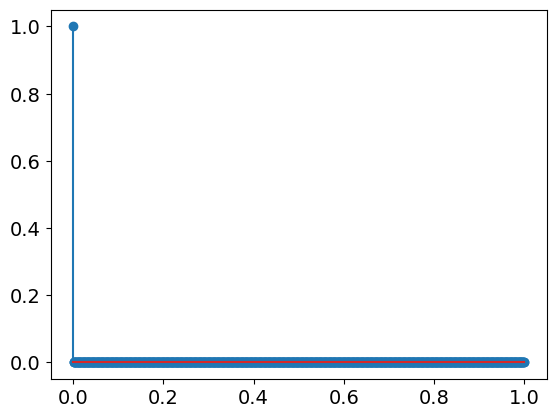

In [29]:
#fc.plt.stem(vetor_tempo, x_senoidal)
fc.plt.stem(vetor_tempo, impulso_unitario(x_senoidal))
plt.show()


- Como os sinais são digitais, raramente o valor do sinal amostrado será 0, por isso o impulso funciona muito mais como uma função ideal.